## Classification of Movie Reviews - IMDB dataset

First, we load news dataset from Keras package. It's Reuters dataset which consists of 46 topics

In [1]:
from keras.datasets import reuters

# Select only the top 10,000 most frequent words
(train_data, train_lables), (test_data, test_lables) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


Encoding the integer sequences into a binary matrix for the first layer of neural network

In [2]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    
    results = np.zeros((len(sequence), dimension))
    
    for i , sequence in enumerate(sequence):
        
        results[i, sequence] = 1
        
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

# Shape of dataset
x_train.shape

# A sample of dataset looks like this
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

One hot-encoding for categorical data

In [3]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_lables)
one_hot_test_labels = to_categorical(test_lables)

one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Parameters of Neural Network. To improve accuracy of the model, its parameter should be tuned.

In [4]:
num_hidden_units = 128
hidden_layer_act_func = 'relu'
output_layer_act_func = 'softmax'
optimizer = 'rmsprop'
loss_func = 'categorical_crossentropy'
epochs = 10
batch_size = 512

A three-layer network. It should be noted that number of hidden units is 64 units to prevent dropping relevant infomation.

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(num_hidden_units, activation=hidden_layer_act_func, input_shape=(10000,)))
model.add(layers.Dense(num_hidden_units, activation=hidden_layer_act_func))
model.add(layers.Dense(num_hidden_units, activation=hidden_layer_act_func))
model.add(layers.Dense(46, activation=output_layer_act_func))

After the model was created, you need to determine opitimizer and loss function.

In [6]:
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

A validation set is created to monitor the accuracy of the model on data it has never seen before.

In [7]:
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]
partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

Now, it's time to train the model.

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 141us/step - loss: 2.2032 - acc: 0.5336 - val_loss: 1.4192 - val_acc: 0.6740
Epoch 2/10
7982/7982 [==============================] - 0s 61us/step - loss: 1.2132 - acc: 0.7254 - val_loss: 1.1890 - val_acc: 0.7270
Epoch 3/10
7982/7982 [==============================] - 0s 60us/step - loss: 0.8781 - acc: 0.8072 - val_loss: 1.0661 - val_acc: 0.7610
Epoch 4/10
7982/7982 [==============================] - 0s 61us/step - loss: 0.6789 - acc: 0.8425 - val_loss: 0.9686 - val_acc: 0.7890
Epoch 5/10
7982/7982 [==============================] - 0s 61us/step - loss: 0.4764 - acc: 0.8961 - val_loss: 0.9749 - val_acc: 0.7930
Epoch 6/10
7982/7982 [==============================] - 0s 60us/step - loss: 0.3833 - acc: 0.9133 - val_loss: 0.9186 - val_acc: 0.8150
Epoch 7/10
7982/7982 [==============================] - 0s 60us/step - loss: 0.2800 - acc: 0.9357 - val_loss: 1.0181 - val_acc: 0.7920
Epoch 

Let's plot training and validation loss using Matplotlib package

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss'] # Training loss
val_loss_values = history_dict['val_loss'] # Validation loss

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

Plotting the training and validation accurcy

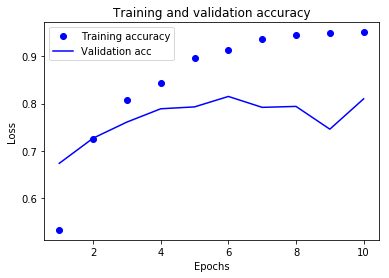

In [10]:
plt.clf # Clear previous fig
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Evaluate model

In [11]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 64us/step


[1.0983259726717125, 0.7876224399462196]

Predictions on new data (test data). Probability over 46 topics.

In [12]:
model.predict(x_test)

array([[4.99678026e-06, 4.67748896e-06, 2.41081022e-09, ...,
        2.56334914e-07, 8.55840696e-08, 1.46446393e-08],
       [2.77487934e-03, 1.26268312e-01, 3.49568538e-02, ...,
        9.49214882e-06, 3.42367170e-03, 1.80671035e-04],
       [6.51767594e-04, 7.34893560e-01, 1.68594043e-03, ...,
        7.35469075e-05, 1.55577247e-04, 4.69022962e-05],
       ...,
       [4.56698672e-07, 5.72134331e-06, 3.93553250e-07, ...,
        1.91794402e-06, 7.37792405e-08, 3.57331515e-08],
       [2.73333309e-04, 1.11528605e-01, 1.31931494e-03, ...,
        2.43153702e-03, 3.79625126e-04, 8.51615041e-05],
       [7.17994089e-06, 8.37083161e-01, 4.92893765e-03, ...,
        2.21660594e-06, 6.66408005e-06, 1.02995864e-06]], dtype=float32)